# T-Distributed Stochastic Neighbor Embedding

We have already seen popular dimension reduction methods such as PCA and SVD. These methods are linear in nature. Classical multidimensional scaling (MDS) is also linear in nature. These methods push dissimilar data points away from each other. For high dimensional data, data points which are lying on or near to the low dimensional, non-linear manifold, it is usually more important to keep the low dimensinal representations of very similar data poits close together and that is not possible with linear mapping. Even though there are several non-linear dimension reduction techniques available in the literature, t-Distributed Stochastic Neighbor Embeding (t-SNE) is found to be quite effective in realife data to segregate data points through non-linear mapping. t-SNE is actually an improvement over Stochastic Neighbor Embedding (SNE) technique. Hence, we need to first understand the SNE and then we can move on to the t-SNE.

<h2><b>SNE</b></h2>

Idea of SNE is rather simple.
* Convert the Euclidean distance into conditional probabilities to represent similarities between two data points
* Express neighborhood using Gaussian distribution
* Match the distribution of data points in the high dimension with that of in the low dimensions.

Let $p_{j/i}$ denotes the conditional probability that the $x_j$ is in the neighborhood of point $x_i$. As per SNE, this conditional probability is mathematically defined as 

$$p_{j/i}=\frac{exp(-\lVert x_j-x_i\rVert^2/2\sigma_i^2)}{\sum_{k\neq i}exp(-\lVert x_k-x_i\rVert^2/2\sigma_i^2)}$$ 

In the above expression $x_i$ acts as the mean and $\sigma_i$ is the standard deviation of the Gaussian distribution around $x_i$. The characteristic of Gaussian neighborhood is that as the $j^{th}$ point starts moving away from the $i^{th}$ point, the neighborhood score diminishes quickly, unless a significantly large standard deviation $\sigma_i$ is chosen. 

If the similarities between the same data points are to be mapped to the low dimensions (denoted by $y_i$ and $y_j$ respectively), we can try to formulate the conditional probability $q_{j/i}$ in the same way as in the case of higher dimensions as shown below:

$$q_{j/i}=\frac{exp(-\lVert y_j-y_i\rVert^2/2\sigma_i'^2)}{\sum_{k\neq i}exp(-\lVert y_k-y_i\rVert^2/2\sigma_i'^2)}$$

In low dimension, if the standard deviation $\sigma'$ is kept constant for each data point $y_i$, there will be a loss of info but the conditional probabilities will be easier to match. The authors argued that the standard deviation will only do the scaling of the final map and hence, for simplicity, $\sigma'$ value is kept at $\frac{1}{\sqrt 2}$ (a constant) for all the data points. It is to be understood that this simplicity is possible only in case of low dimensions because, in the low dimensions, similar data points will come closer and hence same standard deviation for all data points will not induce too much of error. But in the higher dimensions, the similar data points are also quite away from each other and hence setting same standard deviation will induce much more error. Hence the final conditional probability $q_{j/i}$ takes the form

$$q_{j/i}=\frac{exp(-\lVert y_j-y_i\rVert^2)}{\sum_{k\neq i}exp(-\lVert y_k-y_i\rVert^2)}$$

The next is to match the two probabilities and that can be done using Kullback Leibler divergence (KL divergence). KL divergence is essentially a cost function and its value is always positive. If $P_i$ represents the conditional probability distribution of all other points given the data point $x_i$ and $Q_i$ represents the conditional probability distribution of all other points given the data point $y_i$, then KL divergence is defined as,

$$C=KL\ Divergence=\sum_iKL(P_i\Vert Q_i)=\sum_i\sum_jp_{j/i}log\frac{p_{j/i}}{q_{j/i}}$$

It is to be understood that KL divergence is not symmetric in nature, i.e. $\sum_iKL(P_i\Vert Q_i)\neq \sum_iKL(Q_i\Vert P_i)$. It also means that different types of errors in pairwise distances in low-dimensinal map are weighted differently. For example, there is a large cost for using widely separated map points to represent nearby data points (i.e. using small $q_{j/i}$ to represent large $p_{j/i}$) but there is a low cost for using nearby map points to represent widely separated data points. **SNE focuses on retaining the local structure of the data in the map**. 

The next task is to select the Gaussian parameter $\sigma_i$ for each data point in the high dimensional data set. This is important because densities of data points may vary quite significantly in the high dimensional feature space. Any particular value of $\sigma_i$ will induce a probability distribution $P_i$ over all the data points and hence there would be an associated entropy which would increase as $\sigma_i$ increases. To arrive at the value of $\sigma_i$, a term perplexity is introduced which is defined as a function of Shanon entropy as shown below:

$$Perp(P_i)=2^{H(P_i)},\ where\\ $$
$$H(P_i)=-\sum_jp_{j/i}log_2(p_{j/i})$$

$\sigma_i$ is estimated using a binary search considering the $Perp(P_i)$ equation. The authors has suggested a range of this perplexity values from 5 to 50 which works quite well in the real world scenarios. It is also seen that the performance of SNE is quite robust to the choice of value of perplexity. 

To minimize the cost function $C$ mentioned above, it is required to be partially differentiated w.r.t the parameters, that is, $y_i$ values. The final expression of the partial differentiation is given as:

$$\frac{\partial C}{\partial y_i}=2\sum_j(p_{j/i}-q_{j/i}+p_{i/j}-q_{i/j})(y_i-y_j)$$

The above expression is similar to a sping between $y_i$ and $y_j$ and the spring will either attract or repel the two points based on whether the distance is either too small or two large in the map to represent the data points in the similarities between the two points in the high dimensional space. The entity $(y_i-y_j)$ is the length of the spring and $(p_{j/i}-q_{j/i}+p_{i/j}-q_{i/j})$ represents the stiffness of the spring which is, in essence, the mismatch between the pairwise similarities of the data points and the map points.

Gradient descent algorithm is initialized by sampling map points randomly from a isotropic Gaussian having small variance that is centered around the origin. Intially the learning rate is kept quite high (~200) which induces higher momentum at the initial phase and the learning rate decreases as the iteration increases which causes an exponential decay in the sum of previous gradients! (We will see more abount this momentum term in our deep learning sessions). The expression related to the process of updating the coordinates of the map points after $t$ iterations is given as:

$$Y^{(t)}=Y^{(t-1)}+\eta (t)\frac{\partial C}{\partial Y}+\alpha (t)(Y^{(t-1)}-Y^{(t-2)})$$

$\alpha (t)$ is the momentum term at iteration $t$. Initially, Gaussian noise is added to the map points after each iteration and with the progress of the iteration, the noise variance is reduced to produce the final global structure of the map points to represent the data points in the higher dimensions. In this situation, SNE needs very fine tuned hyperparameter sets (noise variance for the instance) and it was also seen that it suffers from crowding problem. Crowding problem points towards the situation when the map points get collapsed into a single point due to incapability of restoring the local structure of the data points in the higher dimensions. Consider the situation, in $3D$ space, it is quite possible to put 4 points at equi-distance from each other. But, if these four points are to be shown in $1D$, there is no way the same local structure can be shown with four points in $1D$. Hence, data points will simply collapse into a single point (or two) giving the distorted map. This problem was addressed by

* Making some arrangements to convert the non-symmetrical KL divergence symmetric (math part is suppressed)
* Assuming $t-distribution$ for the map points instead of Gaussian distribution as was used in the original SNE

It was seen that as t-distribution has thicker tail than Gaussian distribution and Gaussian distribution was considered for the data points in the higher dimensions, this mismatched tail could compensate for the mismatched dimensionality in an efficient way. In experiments, t-distributed SNE  outperformed other versions of SNE and that is why, presently, we only see t-SNE. The affinity mapping as per t-distribution is given below:

$$q_{ij}=\frac{(1+\lVert y_i-y_j\rVert^2)^{-1}}{\sum_{k\neq l}(1+\lVert y_k-y_l\rVert^2)^{-1}}\\ $$
$$And\\ $$
$$p_{j/i}=\frac{exp(-\lVert x_j-x_i\rVert^2/2\sigma^2)}{\sum_{k\neq i}exp(-\lVert x_k-x_i\rVert^2/2\sigma^2)}\ with\ p_{ij}=\frac{p_{j/i}+p_{i/j}}{2n}\\ $$

Students are advised to go through <a href='https://www.jmlr.org/papers/volume9/vandermaaten08a/vandermaaten08a.pdf?fbclid=IwAR0Bgg1eA5TFmqOZeCQXsIoL6PKrVXUFaskUKtg6yBhVXAFFvZA6yQiYx-M'>this paper</a> for further details.

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
tsne = TSNE()

In [ ]:
from sklearn.datasets import load_digits

In [ ]:
data = load_digits()

In [ ]:
D = data['data']
target = data['target']

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
tsne_mat = tsne.fit_transform(X=D)

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


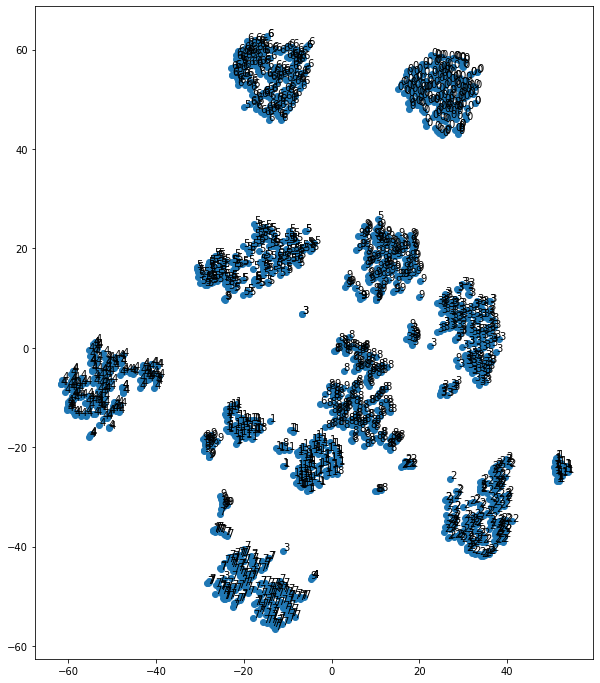

In [ ]:
plt.figure(figsize=(10,12))
plt.scatter(tsne_mat[:,0], tsne_mat[:,1])
for i in range(len(target)):
    plt.text(x=tsne_mat[i,0],y=tsne_mat[i,1], s=target[i])
plt.show()